In [31]:
with open("inputData/mi.txt","r") as file:
    lines = file.readlines()

In [32]:
lst = []
for i in lines:
    if i != '"此用户没有填写评论!"\n':
        lst.append(i.replace('"',"").strip("\n"))
lst

['非常好用！就是有个问题，面部解锁后仍然黑屏，这点不太人性化。找了半天怎么设置也找不到。拍照效果没有想象中优秀，晚上拍照噪点比较多，希望能再用心调教一下。另外，内置软件太多，删了好多没用的。请问，能不能精简点呢。',
 '第一次在网上买这么贵的东西，之前有些当心，怕是假货 ，用了十几天整体感觉不错，运行也比较快，电量充一个小时多小时就满了，外观也很漂亮，像素也比较清楚，就是不能直接插耳机，用送的转换口，有些功能不太了解，不过支持国产，支持小米。',
 '头一次买小米系列手机，之前一直用努比亚，但是系统不是多好，听说小米系统优化的不错，买一个小米手机试试，使用起来反应挺快，就是广告有点多，性价比还可以',
 '刚开始用打开全屏模式不是很顺手，所以又把虚拟按键开了出来，其他的都很好，处理器杠杠的，玩游戏全开到最高',
 '确实不错，手感非常棒，大刘海实际用起来也没有觉得很突兀，现在已经完全习惯了全面屏的手势操作，真的超方便 ，只是贴膜的话不好贴，普通的钢化膜会距离屏幕边缘有很大一段距离，还赠送的手环，也超喜欢的。第一次用小米，并没有出现发热的情况，白忐忑那么久了哈哈哈',
 '因为没抢到屏幕指纹版刚开始还是有点失望的，毕竟把整个发布会都看完了。索性直接买了8，不过到手才发现其实颜值性能啥的但也都够我用了，拍照不是特别多，感觉相机还好不过用不到，平时喜欢打打游戏到目前来看也没有出现掉电很快或者是卡顿发热的状况，算是忠实米粉了，这次特意买了大一点的内存，希望能多用段时间，之前一直是max系列，现在发现小手机也挺好哈！希望小米以后能在手机套餐选择上多点也优惠点，不然手机到手还要到处买一些其他配件也有点麻烦！总的来说还不错！',
 '支持小米 支持国货 黑科技很强大 爱不释手??',
 '手机很好用 性价比很高 点都不卡顿 像素也很高 一款很适合学生用的手机 之前一直用的是红米系列的 感觉都还可以 就是容易发烫 但这款小米8用着很舒服也不发烫 我买的蓝色这款颜值很高 建议大家也来选这款 就是没有送钢化膜感觉有点遗憾 前两天把膜选了 估计这两天就会到 毕竟是我买得最贵的一款手机 怎么说也要保护好了 总体来说还是比较不错 点个赞。。。',
 '总体还是挺好的。下载跟网页浏览还是蛮快的。就是不知道那个智能遥控为什么会没有呢？双频GPS还没有试用过。那个拍照还是挺好的，有美颜功能。如

In [33]:
import jieba

In [34]:
word_lst = []
for i in lst:
    word_lst.append(jieba.cut(i))

In [35]:
words_lst = []
for i in word_lst:
    gtr = []
    for word in i:
        gtr.append(word)
    words_lst.append(gtr)

In [36]:
with open("inputData/stopword.txt","r") as file:
    stopwords = file.readlines()

In [37]:
stopwordsList = []
for i in stopwords:
    stopwordsList.append(i.strip("\n"))

In [50]:
stopwordsList = stopwordsList+["小米","手机"," "]

In [51]:
words_lst_stop = []
for i in words_lst:
    lst = []
    for j in i:
        if j not in stopwordsList:
            lst.append(j)
    words_lst_stop.append(lst)

In [52]:
words_lst_stop_dist = []
for i in words_lst_stop:
    lst = []
    for word in i:
        if word not in lst:
            lst.append(word)
    words_lst_stop_dist.append(lst)

In [53]:
allwords_stop_dist = []
for i in words_lst_stop_dist:
    for j in i:
        allwords_stop_dist.append(j)

In [54]:
import pandas as pd

In [55]:
df1 = pd.DataFrame(allwords_stop_dist,columns=["words"])

In [56]:
df2 = df1["words"].value_counts().reset_index()

In [70]:
import matplotlib.pyplot as plt
backgroundImg = plt.imread("inputData/03.jpg")
from wordcloud import WordCloud,ImageColorGenerator

In [74]:
wc = WordCloud(width=3000,height=1600,background_color="white",font_path="c://simhei.ttf",max_font_size=400,random_state=50)

In [75]:
wc = wc.fit_words({x[0]:x[1] for x in df2.head(100).values})

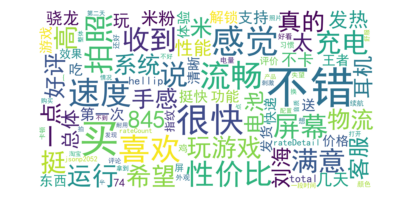

In [76]:
plt.axis("off")
plt.imshow(wc,interpolation="bilinear")
plt.savefig("inputData/2.png")